# Introduction

In this notebook, I will be analysing our netflix account data to understand our viewing history. I have used external data sources from kaggle for data engineering and data augmentation. 

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re
import calendar
import seaborn as sns
from matplotlib import pyplot as plt

/kaggle/input/netflix-data/IMDb movies.csv
/kaggle/input/netflix-data/NetflixViewingHistory.csv
/kaggle/input/netflix-data/IMDb ratings.csv
/kaggle/input/netflix-data/netflix_titles.csv


In [2]:
history = pd.read_csv('/kaggle/input/netflix-data/NetflixViewingHistory.csv')
netflix_data = pd.read_csv('/kaggle/input/netflix-data/netflix_titles.csv')

In [3]:
dataset=history
sns.set(style="whitegrid")

# Data Pre-Processing

In [4]:
dataset.head()

,Title,Date
0,Friends: Season 2: The One Where Old Yeller Dies,05/09/20
1,Cursed: Season 1: The Fey Queen,05/09/20
2,Cursed: Season 1: Bring Us In Good Ale,05/09/20
3,Annihilation,05/09/20
4,Naruto: Season 8: The Mysterious Curse of the ...,05/09/20


In [5]:
def title_segmentation(df, col, col2):
    index_col = df.columns.get_loc(col)
    index_col2 = df.columns.get_loc(col2)
    title=""
    for rows in range(len(df)):
        title = df.iat[rows, index_col]
        new_title=""
        season=""
        count=0
        for i in range(len(title)):
            if title[i]!=":":
                if count==0:
                    new_title = new_title+title[i]
                elif count==1:
                    season = season+title[i]
                else:
                    break
            else:
                count=count+1
                
        df.iat[rows, index_col] = new_title
        if season=="":
            season="N/A"
        df.iat[rows, index_col2] = season

dataset["Season"]=""
title_segmentation(dataset, 'Title', 'Season')

In [6]:
dataset.head()

,Title,Date,Season
0,Friends,05/09/20,Season 2
1,Cursed,05/09/20,Season 1
2,Cursed,05/09/20,Season 1
3,Annihilation,05/09/20,N/A
4,Naruto,05/09/20,Season 8


## Top 10 shows watched

In [7]:
dataset['Views_total']=1
g=dataset.groupby(['Title'])
df=g.sum()

In [8]:
drop=['Season','Date','Views_total']
dummy = dataset.drop(drop,axis=1)
dummy = pd.merge(df,dummy, on='Title', how='inner')
dummy = dummy.drop_duplicates()

In [9]:
print("Top 10 shows watched:")
dummy=dummy.sort_values(["Views_total"],ascending=False)
df = dummy.head(10)
df

Top 10 shows watched:


,Title,Views_total
5421,The Big Bang Theory,279
1551,Friends,234
3774,Naruto,194
261,Arrow,160
4333,Pretty Little Liars,144
772,Brooklyn Nine-Nine,130
2214,Grimm,123
5118,Suits,121
1951,Gossip Girl,121
3232,Marvel's Agents of S.H.I.E.L.D.,118


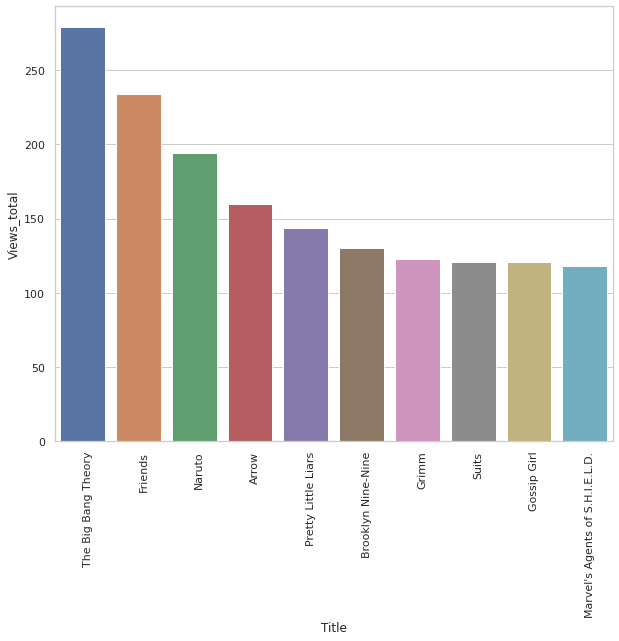

In [10]:
dummy=dummy.sort_values(["Views_total"],ascending=False)
df = dummy.head(10)
fig, ax = plt.subplots(figsize=(10, 8))
chart = sns.barplot(x=df['Title'],y=df['Views_total'])
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=90, horizontalalignment='left')
plt.show()

## Top 10 shows watched(based on seasons)

In [11]:
dataset.drop('Views_total',axis=1,inplace=True)
dataset['Views_season']=1
g=dataset.groupby(['Title','Season'])
df=g.sum()

In [12]:
drop=['Date','Views_season']
dummy = dataset.drop(drop,axis=1)
on=['Title','Season']
dummy = pd.merge(df,dummy, on=on, how='inner')
dummy = dummy.drop_duplicates()

In [13]:
dummy=dummy.sort_values(["Views_season"],ascending=False)
df=dummy.head(10)

In [14]:
print("Top 10 shows watched according to season:")
df

Top 10 shows watched according to season:


,Title,Season,Views_season
2600,Inazuma Eleven,Season 1,65
4924,Shadowhunters,The Mortal Instruments,55
2701,Iron Man,Armored Adventures,52
1452,Fairy Tail,Season 1,37
164,Accidentally in Love,Season 1,30
3880,Naruto,Season 5,29
3826,Naruto,Season 3,28
1074,DEATH NOTE,Season 1,27
4287,Power Rangers S.P.D.,Season 1,27
1196,Demon Slayer,Kimetsu no Yaiba,26


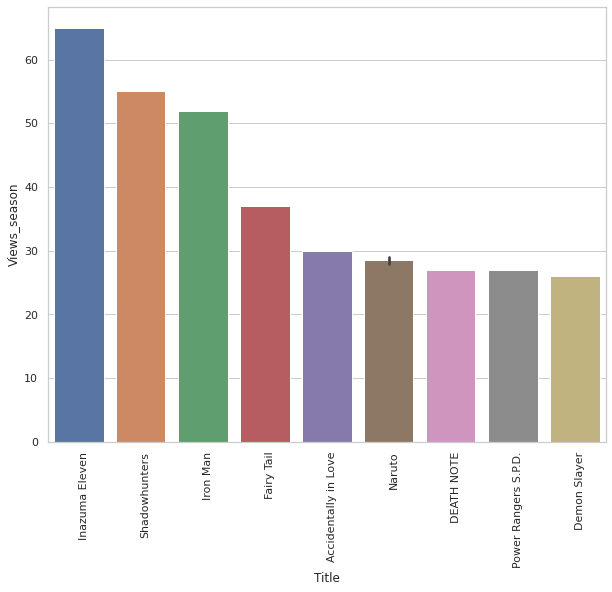

In [15]:
dummy=dummy.sort_values(["Views_season"],ascending=False)
fig, ax = plt.subplots(figsize=(10, 8))
chart=sns.barplot(x=df['Title'],y=df['Views_season'])
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=90, horizontalalignment='left')
plt.show()

In [16]:
dataset.drop('Views_season', axis=1, inplace=True)
dataset['Views_total']=1
g=history.groupby(['Title'])
df=g.sum()
dataset.drop('Views_total', axis=1, inplace=True)
dataset=pd.merge(dataset,df,on='Title',how='inner')

In [17]:
def date_segmentation(df, col, col2, col3):
    index_col = df.columns.get_loc(col)
    index_col2 = df.columns.get_loc(col2)
    index_col3 = df.columns.get_loc(col3)
    for rows in range(len(df)):
        date = df.iat[rows, index_col]
        m=""
        d=""
        count=0
        for i in range(len(date)):
            if date[i]!='/':
                if count==0:
                    d=d+date[i]
                elif count==1:
                    m=m+date[i]
                else:
                    break
            else:
                count=count+1
                if count==1:
                    df.iat[rows, index_col2]=int(d)
                else:
                    df.iat[rows, index_col3]=int(m)
        
        
dataset['Day']=0
dataset['Month']=0
date_segmentation(dataset, 'Date', 'Day', 'Month')

In [18]:
dataset.head()

,Title,Date,Season,Views_total,Day,Month
0,Friends,05/09/20,Season 2,234,5,9
1,Friends,04/09/20,Season 2,234,4,9
2,Friends,03/09/20,Season 2,234,3,9
3,Friends,02/09/20,Season 2,234,2,9
4,Friends,01/09/20,Season 2,234,1,9


In [19]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year

In [20]:
# Function to convert month number to month names

def month_converter(df, col, col2):
    index_col = df.columns.get_loc(col)
    index_col2 = df.columns.get_loc(col2)
    for rows in range(len(df)):
        month = df.iat[rows, index_col]
        
        if df.iat[rows,index_col]==1:
            df.iat[rows, index_col2]="January"
        if df.iat[rows,index_col]==2:
            df.iat[rows, index_col2]="February"
        if df.iat[rows,index_col]==3:
            df.iat[rows, index_col2]="March"
        if df.iat[rows,index_col]==4:
            df.iat[rows, index_col2]="April"
        if df.iat[rows,index_col]==5:
            df.iat[rows, index_col2]="May"
        if df.iat[rows,index_col]==6:
            df.iat[rows, index_col2]="June"
        if df.iat[rows,index_col]==7:
            df.iat[rows, index_col2]="July"
        if df.iat[rows,index_col]==8:
            df.iat[rows, index_col2]="August"
        if df.iat[rows,index_col]==9:
            df.iat[rows, index_col2]="September"
        if df.iat[rows,index_col]==10:
            df.iat[rows, index_col2]="October"
        if df.iat[rows,index_col]==11:
            df.iat[rows, index_col2]="November"
        if df.iat[rows,index_col]==12:
            df.iat[rows, index_col2]="December"

dataset['Month_Name']=""
month_converter(dataset, 'Month', 'Month_Name')

In [21]:
dataset.head()

,Title,Date,Season,Views_total,Day,Month,Year,Month_Name
0,Friends,2020-05-09,Season 2,234,5,9,2020,September
1,Friends,2020-04-09,Season 2,234,4,9,2020,September
2,Friends,2020-03-09,Season 2,234,3,9,2020,September
3,Friends,2020-02-09,Season 2,234,2,9,2020,September
4,Friends,2020-01-09,Season 2,234,1,9,2020,September


In [22]:
# function to convert weekdays to weeknames

def day_converter(df,new_col,old_col):
    index_old = df.columns.get_loc(old_col)
    index_new = df.columns.get_loc(new_col)
    for row in range(0,len(df)):
        df.iat[row,index_new]=calendar.day_name[df.iat[row, index_old].weekday()]
        
dataset['Day_Name']=""
dataset['Date']=pd.to_datetime(history['Date'])
day_converter(dataset,'Day_Name','Date')

In [23]:
dataset.head()

,Title,Date,Season,Views_total,Day,Month,Year,Month_Name,Day_Name
0,Friends,2020-05-09,Season 2,234,5,9,2020,September,Saturday
1,Friends,2020-05-09,Season 2,234,4,9,2020,September,Saturday
2,Friends,2020-05-09,Season 2,234,3,9,2020,September,Saturday
3,Friends,2020-05-09,Season 2,234,2,9,2020,September,Saturday
4,Friends,2020-05-09,Season 2,234,1,9,2020,September,Saturday


## Plot to comapare yearly views since 2016

In [24]:
df = dataset
drop = ['Date', 'Season', 'Views_total', 'Day',
       'Month', 'Month_Name', 'Day_Name']
df=df.drop(drop,axis=1)
df['Yearly Views'] = 1
g=df.groupby(['Year'])
df2=g.sum()

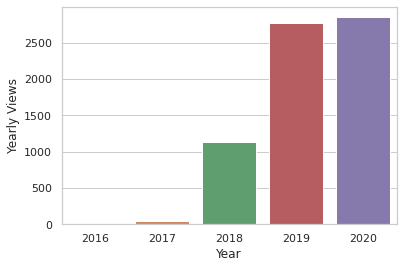

In [25]:
on=['Year']
df.drop('Yearly Views',axis=1,inplace=True)
dummy=pd.merge(df,df2,on=on, how='inner')
chart = sns.barplot(x=dummy['Year'], y=dummy['Yearly Views'])

## Plot to compare monthly views since 2016

In [26]:
df = dataset
drop = ['Date', 'Season', 'Views_total', 'Day',
       'Month', 'Day_Name']
df=df.drop(drop,axis=1)
df['Monthly Views'] = 1
g=df.groupby(['Year','Month_Name'])
df2=g.sum()

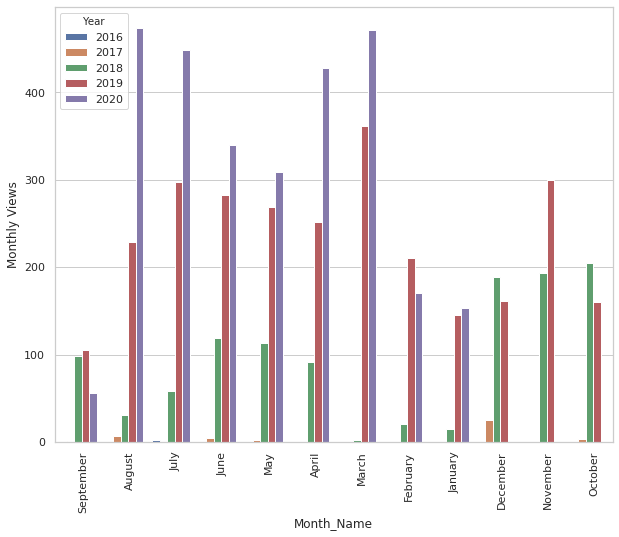

In [27]:
on=['Year','Month_Name']
df.drop('Monthly Views',axis=1,inplace=True)
dummy=pd.merge(df,df2,on=on, how='inner')
fig, ax = plt.subplots(figsize=(10, 8))
chart = sns.barplot(x=dummy['Month_Name'], y=dummy['Monthly Views'], hue=dummy['Year'])
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=90, horizontalalignment='left')
plt.show()

# Data Engineering-Movies

In [28]:
netflix_data.head()
netflix_data['Title']=netflix_data['title']

In [29]:
dataset=pd.merge(dataset,netflix_data,on='Title', how='inner')

In [30]:
movies = dataset[dataset['type']=="Movie"]

In [31]:
drop=['cast','title','show_id','description','type','Season','director','country','duration']
movies=movies.drop(drop, axis=1)

In [32]:
movies.head()

,Title,Date,Views_total,Day,Month,Year,Month_Name,Day_Name,date_added,release_year,rating,listed_in
578,Pad Man,2020-07-27,1,2,9,2020,September,Monday,"August 21, 2018",2018,PG-13,"Dramas, International Movies, Romantic Movies"
579,Swami,2020-07-27,1,2,9,2020,September,Monday,"December 31, 2019",1977,TV-PG,"Dramas, Independent Movies, International Movies"
585,Queen,2020-07-26,1,31,8,2020,August,Sunday,"May 1, 2017",2014,TV-MA,"Comedies, Dramas, International Movies"
655,Battle,2020-07-21,1,30,8,2020,August,Tuesday,"December 1, 2018",2018,TV-MA,"Dramas, International Movies, Romantic Movies"
656,Kabir Singh,2020-07-21,1,30,8,2020,August,Tuesday,"September 19, 2019",2019,TV-MA,"Dramas, International Movies, Romantic Movies"


In [33]:
movie_details = pd.read_csv('/kaggle/input/netflix-data/IMDb movies.csv')

In [34]:
movie_details['Title']=movie_details['title']

In [35]:
movies=pd.merge(movies,movie_details,on='Title', how='inner')

In [36]:
drop=['title','original_title','imdb_title_id','reviews_from_users','reviews_from_critics','worlwide_gross_income','writer','usa_gross_income','budget', 'production_company']
movies=movies.drop(drop, axis=1)

In [37]:
movies.head()

,Title,Date,Views_total,Day,Month,Year,Month_Name,Day_Name,date_added,release_year,...,genre,duration,country,language,director,actors,description,avg_vote,votes,metascore
0,Swami,2020-07-27,1,2,9,2020,September,Monday,"December 31, 2019",1977,...,Drama,129,India,Hindi,Basu Chatterjee,"Shabana Azmi, Girish Karnad, Utpal Dutt, Dheer...","Shortly after Saudamani's birth, her dad passe...",6.7,117,NaN
1,Swami,2020-07-27,1,2,9,2020,September,Monday,"December 31, 2019",1977,...,Drama,140,India,Hindi,Ganesh Acharya,"Manoj Bajpayee, Juhi Chawla, Maninder Wasu, Ne...","Swami, Radha and their kid shift to Mumbai aft...",7.0,327,NaN
2,Queen,2020-07-26,1,31,8,2020,August,Sunday,"May 1, 2017",2014,...,"Comedy, Drama",146,India,"Hindi, English, French, Japanese, Dutch",Vikas Bahl,"Kangana Ranaut, Rajkummar Rao, Lisa Haydon, Je...",A Delhi girl from a traditional family sets ou...,8.2,56449,NaN
3,Queen,2020-07-26,1,31,8,2020,August,Sunday,"May 1, 2017",2014,...,"Comedy, Crime, Mystery",157,India,Malayalam,Dijo Jose Antony,"Dhruvan, Saniya Iyappan, Eldho Mathew, Ashwin ...",The story starts with the inauguration of the ...,7.1,1198,NaN
4,Battle,2020-07-21,1,30,8,2020,August,Tuesday,"December 1, 2018",2018,...,Drama,95,USA,English,Laron Austin,"Conrad Clifton, Onira Tares, Chris Burns, Erro...",When thieves steal the tracks that Rippa was u...,2.0,106,NaN


In [38]:
# we will be extracting primary genre for visualisation purposes

def genre_segmentation(df, col):
    index_col = df.columns.get_loc(col)
    
    for row in range(len(df)):
        genre = df.iat[row,index_col]
        genre_new=""
        for i in range(len(genre)):
            if genre[i]!=',':
                genre_new=genre_new+genre[i]
            else:
                break
        
        df.iat[row,index_col]=genre_new
        
genre_segmentation(movies, 'genre')

In [39]:
drop=['Date','Month','Day','Year','Month_Name','Day_Name','year','duration','date_published']
dummy=movies.drop(drop,axis=1)
dummy = dummy.drop_duplicates()

## Movie views based on genre

In [40]:
dummy['Genre Views']=1
drop = ['avg_vote','Views_total','votes', 'metascore','release_year','rating']
g=dummy.drop(drop, axis=1).groupby(['genre'])
df=g.sum()

In [41]:
dummy.drop('Genre Views', axis=1, inplace=True)
dummy=pd.merge(dummy,df,on='genre',how='inner')

In [42]:
drop = ['Title', 'Views_total', 'date_added', 'release_year', 'rating',
       'listed_in','country', 'language', 'director', 'actors',
       'description', 'avg_vote', 'votes', 'metascore']
dummy2 = dummy.drop(drop, axis=1)

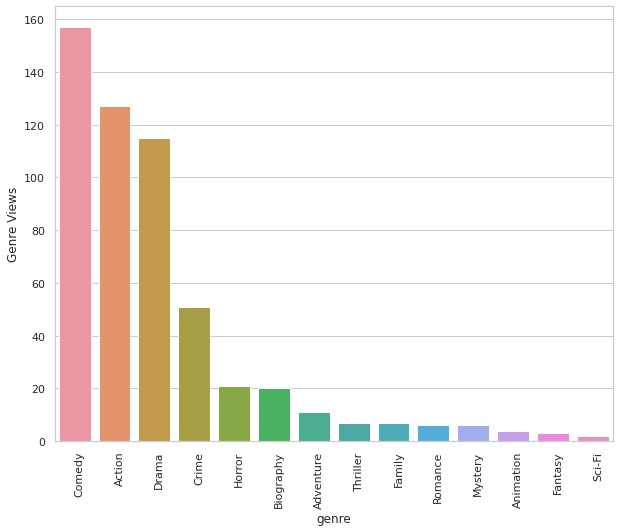

In [43]:
dummy2=dummy2.sort_values(["Genre Views"],ascending=False)
fig, ax = plt.subplots(figsize=(10, 8))
chart = sns.barplot(x=dummy2['genre'],y=dummy2['Genre Views'])
chart.set_xticklabels(labels=chart.get_xticklabels(),rotation=90, horizontalalignment='left')
plt.show()

# Conclusion

So far, I have observed that:
1. we have watched a lot of TV-shows/movies during 2020. The reason is obvious, due to lockdown and covid-19 situation. 
2. We used a lot of netflix during the month of July and August. 
3. Big-Bang Theory has been one of the most watched TV-shows till now followed by Friends and Naruto.
4. In case of movies, we have watched comedy genre movies a lot followed by action movies.

I will be trying to do some more analysis based on other features like duration of movie, country of making etc.